In [80]:
# dependencias que eventualmente requerirá instalar:
!pip install nltk
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [81]:
# cargar las librerias necesarias
## 1. nltk para 'procesamiento natural del lenguaje'
## 2. pandas para procesamiento de dataframes, muy usado en preparación de datos
## 3. re - expresiones regulares
## 4. numpy, codecs, etc - otras

In [82]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt

In [83]:
# directorios (path) de entrada y salida:
# 
path_in="../../datasets/"
path_out="../../out/"

In [84]:
# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jgaviria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jgaviria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jgaviria/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [85]:
# ejemplo de como nltk tokeniza:
texto="texto libre que permite crear     hiso1iras epor--4 no se preocupe \n hola mundo cruel"
tokens = nltk.word_tokenize(texto)
print(len(tokens))
print(tokens)

15
['texto', 'libre', 'que', 'permite', 'crear', 'hiso1iras', 'epor', '--', '4', 'no', 'se', 'preocupe', 'hola', 'mundo', 'cruel']


In [86]:
# note la estrategia de tokenizar con sentencias simples de python, 
# ¿ cual le parece mejor?
# y note la diferencia entre .split() y .split(' ')
texto="texto libre que permite crear     hiso1iras epor--4 no se preocupe \n hola mundo cruel"
tokens = texto.split()
print(len(tokens))
print(tokens)
tokens = texto.split(' ')
print(len(tokens))
print(tokens)

13
['texto', 'libre', 'que', 'permite', 'crear', 'hiso1iras', 'epor--4', 'no', 'se', 'preocupe', 'hola', 'mundo', 'cruel']
18
['texto', 'libre', 'que', 'permite', 'crear', '', '', '', '', 'hiso1iras', 'epor--4', 'no', 'se', 'preocupe', '\n', 'hola', 'mundo', 'cruel']


In [87]:
df = pd.read_csv(path_in+'doaj_1.csv',delimiter=',')
df.head()

,title,url,path,keywords,category,source,content
0,Crystal structure of apatite type Ca2.49Nd7.51...,http://scripts.iucr.org/cgi-bin/paper?S2056989...,article_batch_1.csv,"crystal structure, apatite structure type, cal...",articles,doaj,"The title compound, Ca2+xNd8–x(SiO4)6O2–0.5x (..."
1,Genetic Programming for Medicinal Plant Family...,http://journals.itb.ac.id/index.php/jictra/art...,article_batch_1.csv,NaN,articles,doaj,Information about medicinal plants that is ava...
2,Managing reality shock: Expectations versus ex...,https://sajip.co.za/index.php/sajip/article/vi...,article_batch_1.csv,"Managing reality shock, Graduate engineers",articles,doaj,The objective of the study is an analysis of t...
3,A Review of Systems and Technologies for Smart...,http://www.mdpi.com/1996-1073/9/5/348,article_batch_1.csv,"smart home, smart grid, energy management syst...",articles,doaj,In the actual era of smart homes and smart gri...
4,Functional testing of the vestibular ocular re...,http://journal.frontiersin.org/Journal/10.3389...,article_batch_1.csv,"Semicircular Canals, Dynamic Visual Acuity, He...",articles,doaj,The experimental assessment of the vestibulo-o...


In [88]:
df = df[['title','content']]
df.head()

,title,content
0,Crystal structure of apatite type Ca2.49Nd7.51...,"The title compound, Ca2+xNd8–x(SiO4)6O2–0.5x (..."
1,Genetic Programming for Medicinal Plant Family...,Information about medicinal plants that is ava...
2,Managing reality shock: Expectations versus ex...,The objective of the study is an analysis of t...
3,A Review of Systems and Technologies for Smart...,In the actual era of smart homes and smart gri...
4,Functional testing of the vestibular ocular re...,The experimental assessment of the vestibulo-o...


In [ ]:
df['tokenized_title'] = df.apply(lambda row: nltk.word_tokenize(str(row['title'])), axis=1)
df['count_title'] = df.apply(lambda row: len(row['tokenized_title']), axis=1)
df['tokenized_content'] = df.apply(lambda row: nltk.word_tokenize(str(row['content'])), axis=1)
df['count_content'] = df.apply(lambda row: len(row['tokenized_content']), axis=1)

In [ ]:
df.head()

In [ ]:
# Tokenize todo el contenido de 'title'
all_tokens_title = []
for t in df['tokenized_title']:
    all_tokens_title.extend(t)

In [ ]:
print("all_tokens_title =",len(all_tokens_title))

In [ ]:
# analisis de frecuencia en palabras de 'title'
fdist_title = nltk.FreqDist(all_tokens_title)
print('Size BoW_title=',len(fdist_title))
topwordstitle = fdist_title.most_common(20)

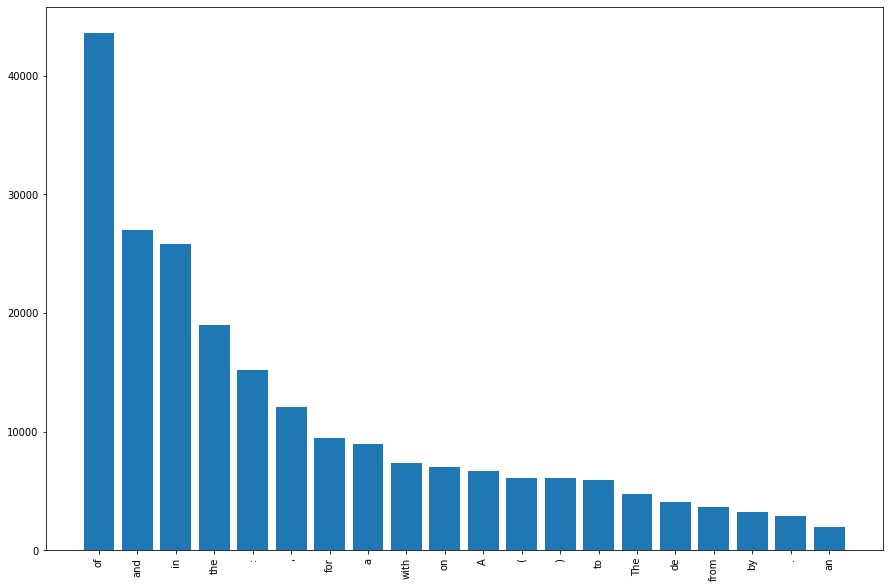

In [50]:
x,y = zip(*topwordstitle)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [53]:
# analisis de frecuencia en palabras de 'content'
all_tokens_content = []
for t in df['tokenized_content']:
    all_tokens_content.extend(t)

In [ ]:
print("all_tokens_content =",len(all_tokens_content))

In [58]:
# analisis de frecuencia en palabras de 'content'
fdist_content = nltk.FreqDist(all_tokens_content)
print('Size BoW_content=',len(fdist_content))
topwordscontent = fdist_content.most_common(20)

Size BoW_content= 359570


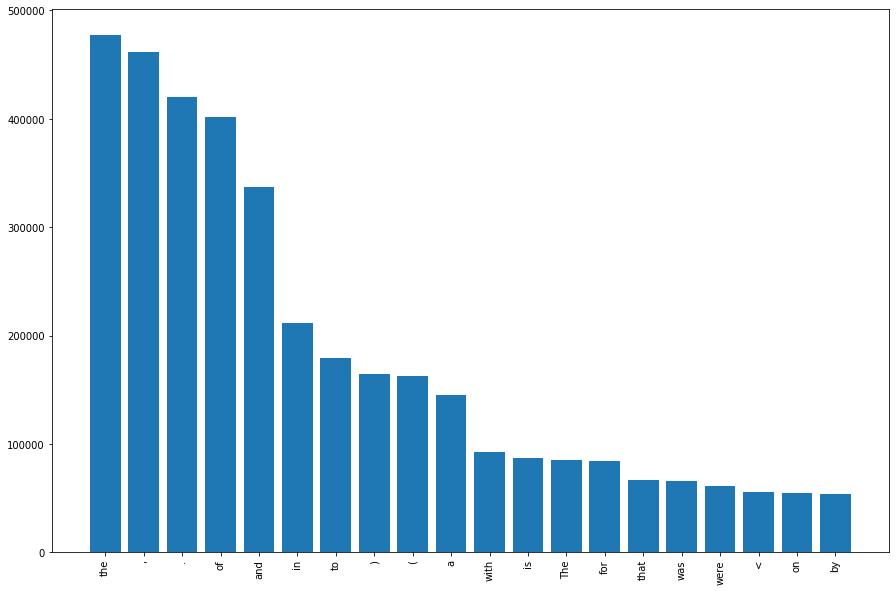

In [61]:
x,y = zip(*topwordscontent)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [63]:
# stopwords en nltk
from nltk.corpus import stopwords
 
stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

179
{'ourselves', 'did', 'from', 'themselves', 'such', 'too', 'by', 'just', "you'll", 'y', 'because', "she's", 'these', 'once', "isn't", 'i', 'out', 'before', 'then', 'isn', 'theirs', 'being', "it's", "wouldn't", 'had', 'having', 'above', 'is', 'very', 'nor', 'off', 'wouldn', 'you', 'doing', 'mustn', 's', 'a', 'below', 'after', 'won', 've', 'your', 'or', 'against', 'how', 'where', 'm', 'should', 'yourselves', 'have', 'been', 'her', 'more', 'only', "mustn't", 'both', 'not', 'will', "shouldn't", 'don', 'over', "you're", 'when', 'do', 'on', 'me', 'd', "couldn't", "don't", 'hers', 'who', 'this', 'yourself', 'itself', 'if', 'for', 'under', "aren't", 'in', 'here', 'few', "hasn't", 'shouldn', 'other', "mightn't", 'most', 'further', 'and', 'between', 'himself', 'him', 'down', 'up', 'so', 'can', 'ma', 'has', 'some', 'all', 'our', "you'd", 'which', 'needn', "you've", 'until', 'their', 'at', 'wasn', 'was', 'it', 'now', 'hasn', "hadn't", 'he', 'during', 'each', "weren't", 'weren', 'we', 'than', 'o

Size of new BoW title = 80377


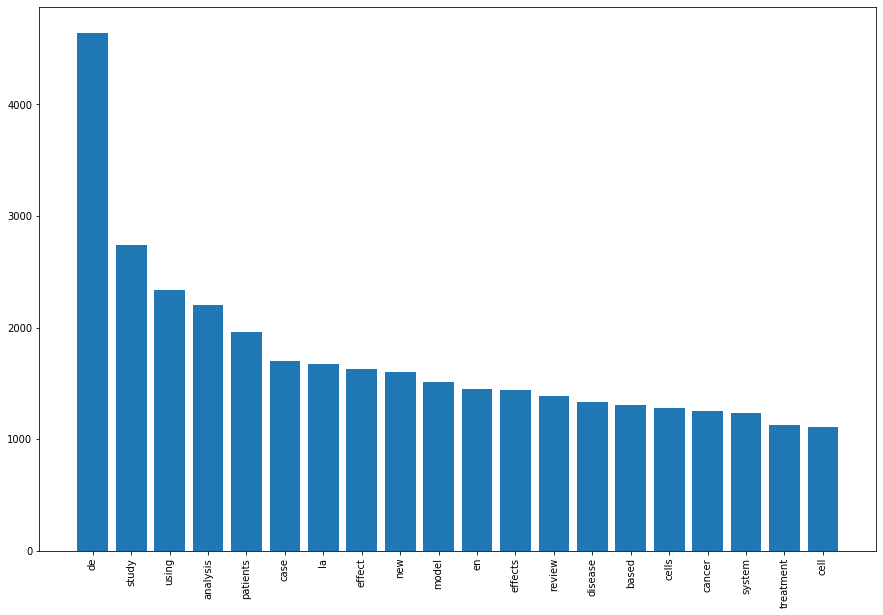

In [65]:
# TOKENIZAR con nltk, 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

# ya tokenizado en all_tokens_title o all_tokens_content
tokens = [w.lower() for w in all_tokens_title if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW title = 58343


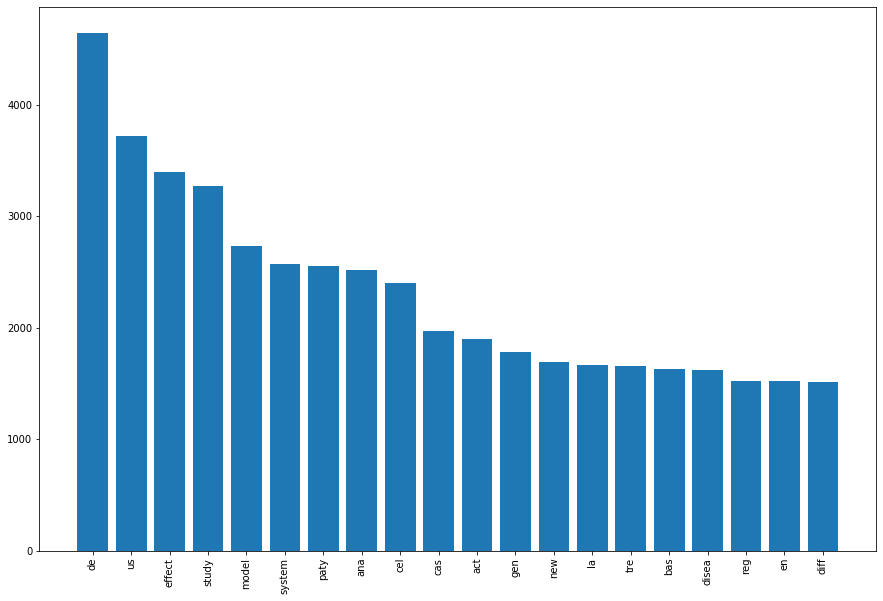

In [67]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()

#tokens = [porter.stem(w) for w in tokens]
tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [69]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/jgaviria/nltk_data'
    - '/usr/local/anaconda3/nltk_data'
    - '/usr/local/anaconda3/share/nltk_data'
    - '/usr/local/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [71]:
# algunas funciones de mejoras para la tokenización:
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w.isalpha()]